<a href="https://colab.research.google.com/github/Morganblabla/Estadistica/blob/main/eii_u1_01_23150264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

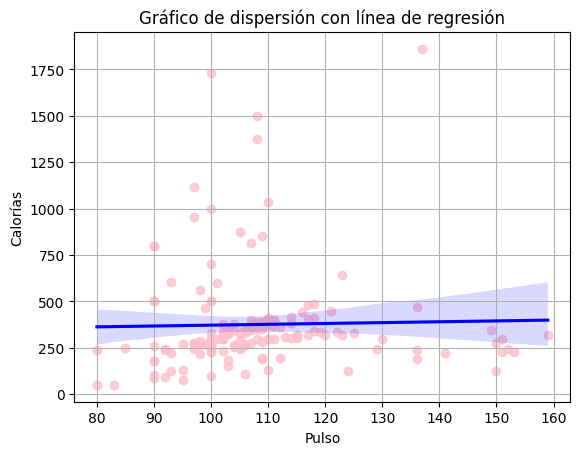

Coeficiente de correlacion: 0.025121130626710265
Coeficiente de determinacion 0.0006310712039642405
Interpretación: El coeficiente de correlación es muy cercano a 0, lo que indica poca relación líneal entre el pulso y las calorías.
El de determinación también es MUY bajo, lo que indica lo mismo. En conclusión, el pulso no parece influir en las calorías registradas
Intervalo de confianza b1 al 98%: (-2.9012230944858155, 3.815553724785344)
Sxx: 34923.87195121952
Sxy: 15965.982926829281
Syy: 11566196.604390245
SSE: 11558897.510773823
SST: 5.169878828456423e-24
SSR: 7.137663957537649e-24
MSR: 7.137663957537649e-24
MSE: 71351.21920230755
F: 3.897961150074504e-06
Interpretación: El intervalo de confianza para la pendiente sugiere que no hay una relación significativa entre el pulso y las calorías,
ya que incluye 0. El valor F muy bajo y el valor de SSE alto sugieren que el modelo no está explicando bien los datos.
En general, la relación entre pulso y calorías parece ser débil o nula.
Test d

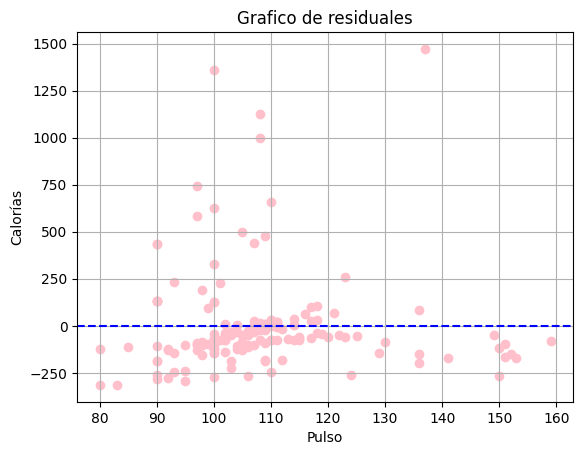

In [48]:
# a) Sube la base de datos a tu repositorio e importala a colab mediante pandas.
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/Morganblabla/Estadistica/refs/heads/main/data.csv")

#Agrega una línea adicional: para eliminar los registros con valores faltantes.
df.dropna(inplace = True)
df

# Elige una variable dependiente y una independiente.
x = df['Pulse']
#Elegí el pulso como x, porque cuando el pulso aumenta, se espera que consumas más calorías.
y = df['Calories']
# Elegí las calorías como y, porque estas son las que se queman durante el ejercicio.

# b) Realiza un gráfico con la dispersión y la recta de regresión ajustada.
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=df["Pulse"], y=df["Calories"], scatter_kws={"color": "pink"}, line_kws={"color": "blue"})
plt.xlabel("Pulso")
plt.ylabel("Calorías")
plt.title("Gráfico de dispersión con línea de regresión")
plt.grid()
plt.show()

# c) Calcula el coeficiente de correlación y el coeficiente de determinación e interpreta los resultados.
Sxx= np.sum((x- np.mean(x))**2)
Sxy= np.sum((x- np.mean(x))*(y- np.mean(y)))
Syy= np.sum((y- np.mean(y))**2)
r= Sxy/ np.sqrt(Sxx*Syy)
print("Coeficiente de correlacion:",r)
print("Coeficiente de determinacion",r**2)
print("Interpretación: El coeficiente de correlación es muy cercano a 0, lo que indica poca relación líneal entre el pulso y las calorías.")
print("El de determinación también es MUY bajo, lo que indica lo mismo. En conclusión, el pulso no parece influir en las calorías registradas")

# d) Obtén un intervalo de confianza de 98% para la pendiente e interpreta el resultado. Respalda tu conclusión usando ANOVA.
b1 = Sxy / Sxx
b0 = np.mean(y) - b1 * np.mean(x)
Yc = b1 * x + b0
residuales = y - Yc
nivel_significancia = 0.02
from scipy.stats import t
t_critico = t.ppf(1 - nivel_significancia / 2, len(y) - 2)
se_b1 = np.sqrt(np.sum((y - Yc) ** 2) / (len(y) - 2)) / np.sqrt(Sxx)
confianza_b1 = (b1 - t_critico * se_b1, b1 + t_critico * se_b1)
print(f"Intervalo de confianza b1 al 98%: {confianza_b1}")
# Tabla ANOVA
print(f"Sxx: {Sxx}")
print(f"Sxy: {Sxy}")
print(f"Syy: {Syy}")
print(f"SSE: {np.sum(residuales**2)}")
print(f"SST: {np.sum(y-np.mean(y))**2}")
print(f"SSR: {np.sum(Yc-np.mean(y))**2}")
print(f"MSR: {np.sum(Yc-np.mean(y))**2/1}")
print(f"MSE: {np.sum(residuales**2)/(len(y)-2)}")
print(f"F: {(np.sum((Yc-np.mean(y))**2)/1)/np.sum(residuales**2)/(len(y)-2)}")
print("Interpretación: El intervalo de confianza para la pendiente sugiere que no hay una relación significativa entre el pulso y las calorías,")
print("ya que incluye 0. El valor F muy bajo y el valor de SSE alto sugieren que el modelo no está explicando bien los datos.")
print("En general, la relación entre pulso y calorías parece ser débil o nula.")

# e) Verifica los supuestos.
# Test de Shapiro
from scipy.stats import shapiro
stat, p_value = shapiro(residuales)
print(f"Test de Shapiro - Estadístico: {stat}, p-valor: {p_value}")
if p_value > 0.05:
    print("Los residuos siguen una distribución normal.")
else:
    print("Los residuos no siguen una distribución normal.")

#Independencia
residuales= y-Yc
plt.figure()
plt.grid()
plt.scatter(x, residuales, color="pink")
plt.xlabel("Pulso")
plt.ylabel("Calorías")
plt.title("Grafico de residuales")
plt.axhline(y=0, color="blue", linestyle="--")
print("Independencia: Mediante el gráfico se puede decir que los residuos no presentan un patrón, lo que indica independencia.")
print("Por lo que si, se verifica el supuesto.")

#Linealidad
print("Linealidad: En el gráfico de dispersión se observa que los datos no siguen una tendencia lineal.")

# Test de  Brausch-Pagan
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
X = sm.add_constant(x)
bp_stat, bp_p_value, _, _ = het_breuschpagan(residuales, X)
print(f"Test de Breusch-Pagan - Estadístico: {bp_stat}, p-valor: {bp_p_value}")
if bp_p_value > 0.05:
    print("No hay evidencia de heteroscedasticidad.")
else:
    print("Hay evidencia de heteroscedasticidad.")
